<a href="https://colab.research.google.com/github/minjaekim070/Bootcamp_Project/blob/main/DSM_%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 import

In [ ]:
!pip install -q fer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!unzip /content/drive/MyDrive/운전자 이상탐지/Validation/[원천]bbox(실제도로환경).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/drive/MyDrive/운전자 이상탐지/Validation/[원천]bbox(실제도로환경).zip'


In [ ]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
import cv2
import numpy as np
import os
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#정리

In [ ]:
folder_path = '/content/drive/MyDrive/운전자 이상탐지/Training/original/bus/R_004_60_M'
extensions = ['jpg']

photo_list = []
for ext in extensions:
    photo_list.extend(glob.glob(os.path.join(folder_path, f'*.{ext}')))

In [ ]:
input_photo_list= []

In [ ]:
detector = FER()

In [ ]:
input_photo_list = photo_list

In [ ]:
emotions_analysis_result = []
for i in range(0, 40):
    photo = input_photo_list[i]
    emotions = detector.detect_emotions(photo)
    if emotions:
      emotions_analysis_result.append(emotions[0]['emotions'])

In [ ]:
# 각각의 감정에 해당하는 확률 값을 따로 모으는 딕셔너리
emotions_by_type = {
    'happy': [],
    'sad': [],
    'surprise': [],
    'neutral': [],
}

# 결과값을 종류별로 모으기
for result in emotions_analysis_result:
    happy = round(sum(result.get(emotion, 0) for emotion in ['happy']), 3)
    sad = round(sum(result.get(emotion, 0) for emotion in ['sad', 'disgust']), 3)
    surprise = round(sum(result.get(emotion, 0) for emotion in ['surprise', 'angry', 'fear']), 3)
    neutral = round(sum(result.get(emotion, 0) for emotion in ['neutral']), 3)

    emotions_by_type['happy'].append(happy)
    emotions_by_type['sad'].append(sad)
    emotions_by_type['surprise'].append(surprise)
    emotions_by_type['neutral'].append(neutral)

# 결과 출력
for emotion, prob_list in emotions_by_type.items():
    print(f"{emotion}: {prob_list}")

happy: [0.34, 0.31, 0.37, 0.3, 0.01, 0.05, 0.06, 0.03, 0.27, 0.02, 0.04, 0.27, 0.02, 0.03, 0.07, 0.03, 0.32, 0.02, 0.24, 0.01, 0.07, 0.25, 0.47, 0.02, 0.27, 0.38, 0.17, 0.09, 0.08, 0.18, 0.29, 0.29, 0.02, 0.29, 0.05, 0.06, 0.26, 0.08, 0.24]
sad: [0.28, 0.24, 0.19, 0.24, 0.19, 0.43, 0.45, 0.6, 0.24, 0.5, 0.55, 0.19, 0.67, 0.35, 0.52, 0.22, 0.25, 0.27, 0.27, 0.33, 0.31, 0.3, 0.25, 0.45, 0.24, 0.2, 0.38, 0.38, 0.5, 0.31, 0.27, 0.21, 0.52, 0.27, 0.23, 0.24, 0.26, 0.39, 0.32]
surprise: [0.25, 0.37, 0.35, 0.37, 0.57, 0.23, 0.23, 0.22, 0.42, 0.27, 0.17, 0.46, 0.08, 0.31, 0.24, 0.62, 0.36, 0.4, 0.43, 0.45, 0.41, 0.31, 0.2, 0.34, 0.42, 0.29, 0.36, 0.15, 0.22, 0.36, 0.31, 0.41, 0.19, 0.36, 0.52, 0.36, 0.41, 0.28, 0.36]
neutral: [0.14, 0.09, 0.09, 0.09, 0.24, 0.29, 0.27, 0.14, 0.07, 0.22, 0.24, 0.08, 0.23, 0.32, 0.17, 0.13, 0.07, 0.3, 0.06, 0.2, 0.22, 0.15, 0.09, 0.19, 0.06, 0.13, 0.09, 0.38, 0.21, 0.15, 0.14, 0.09, 0.26, 0.08, 0.19, 0.35, 0.07, 0.25, 0.08]


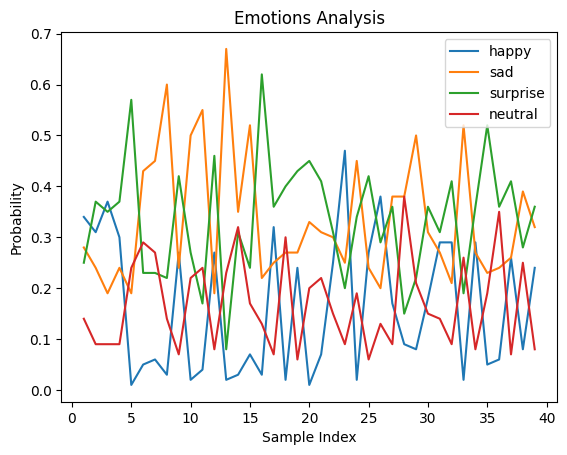

In [ ]:
"""import matplotlib.pyplot as plt
# 그래프로 시각화
for emotion, prob_list in emotions_by_type.items():
    plt.plot(range(1, len(prob_list) + 1), prob_list, label=emotion)

plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Emotions Analysis')
plt.legend(loc='upper right')
plt.show()"""

In [ ]:
# 연속적으로 감지되는 횟수를 세는 변수 초기화
consecutive_detection_count = {
    'happy': 0,
    'sad': 0,
    'surprise': 0,
    'neutral': 0,
}

# 임계값 설정
threshold = 0.6
continuous_threshold = 0.4
continuous_frames = 3  # 연속으로 감지되어야 하는 프레임 수

consecutive_emotion = '' #연속으로 감지된 감정
high_emotion = '' #높게 감지된 감

# 결과 출력
for i, result in enumerate(emotions_analysis_result):
    # 감정별로 확률 값 추출
    happy = round(sum(result.get(emotion, 0) for emotion in ['happy']), 3)
    sad = round(sum(result.get(emotion, 0) for emotion in ['sad', 'disgust']), 3)
    surprise = round(sum(result.get(emotion, 0) for emotion in ['surprise', 'angry', 'fear']), 3)
    neutral = round(sum(result.get(emotion, 0) for emotion in ['neutral']), 3)

    # 감정별 확률 값을 딕셔너리에 추가
    emotions_by_type['happy'].append(happy)
    emotions_by_type['sad'].append(sad)
    emotions_by_type['surprise'].append(surprise)
    emotions_by_type['neutral'].append(neutral)

    # 0.6 이상인 감정 출력
    for emotion, prob in [('happy', happy), ('sad', sad), ('surprise', surprise), ('neutral', neutral)]:
        if prob >= threshold:
            print(f"Frame {i}: High {emotion} detected! Probability: {prob}")
            high_emotion = emotion
            high_prob = prob


        # 연속적으로 0.4 이상인 감정 검사
        if prob >= continuous_threshold:
            consecutive_detection_count[emotion] += 1
        else:
            consecutive_detection_count[emotion] = 0

        # 연속적으로 감지된 횟수가 연속 프레임 수를 충족하면 출력
        if consecutive_detection_count[emotion] >= continuous_frames:
            print(f"Frame {i}: Continuous {emotion} detected ({continuous_frames} frames)!")
            consecutive_emotion = emotion
            consecutive_count = consecutive_detection_count[emotion]

print(high_emotion, high_prob, consecutive_emotion, consecutive_count)

Frame 7: High sad detected! Probability: 0.6
Frame 7: Continuous sad detected (3 frames)!
Frame 12: High sad detected! Probability: 0.67
Frame 15: High surprise detected! Probability: 0.62
Frame 19: Continuous surprise detected (3 frames)!
Frame 20: Continuous surprise detected (3 frames)!
surprise 0.62 surprise 4


In [ ]:
#high로 측정된 emotion과 consecutive emotion이 다른 경우
if high_emotion != consecutive_emotion:
  #0.8이상일 경우
  if high_prob >= 0.8:
    emotion = high_emotion
  #아닌 경우
  else:
    emotion = consecutive_emotion
#같을 경우
else:
  emotion = high_emotion

print(emotion)

surprise


#TTS 구현 및 STT 적용

In [ ]:
#STT 툴
!pip install SpeechRecognition

In [ ]:
#STT 적용 후 음성->텍스트 저장
import speech_recognition as sr

sound_file = '파일경로.wav'
r = sr.Recognizer()

with sr.AudioFile(sound_file) as source:
  audio = r.record(source)

input_voice = r.recognize_google(audio, language='ko-KR')

In [ ]:
#대략적인 구조

#임의 설정
motion_code=1

#1 happy
if emotion == 'happy':
  if ('그래' or '좋아' or '응') in input_voice:
    # happy.wav
#2 sad
elif emotion == 'sad':
  if ('그래' or '좋아' or '응') in input_voice:
    # sad.wav

#3 surprise
elif emotion == 'surprise':
  if ('그래' or '좋아' or '응') in input_voice:
    # surprise.wav

#4 neutral
elif emotion == 'neutral':
  if ('그래' or '좋아' or '응') in input_voice:
    # neutral.wav

#5 else
elif ('아니' or '괜찮아' or '싫어') in input_voice:
  # else.wav

#6 sleep
if motion_code == 2 or 4:
  # sleep.wav


#7 smoke
if motion_code == 7:
  # smoke.wav

#8 phone
if motion_code ==6:
  # phone.wav

#9 yawning
if motion_code == 8:
  # yawn.wav #새로생성해야함

"""0-Face
1- Leye
2- CLeye
3- Reye
4- CReye
5- Mouth
6- Phone
7- Cigar
8-opened_mouth
"""


In [ ]:
voice_code ='man_default'

if voice_code == 'man_default':
  #상우

if voice_code == 'woman_default'
  #애란

if voice_code == 'kid':
  #호빈이